In [2]:
import pandas as pd
import pathlib as path



import requests
import json
from pprint import pprint

import numpy as np
from scipy.stats import linregress

import matplotlib.pyplot as plt
import hvplot.pandas
import geopandas as gpd

# import files

In [3]:
### import and read csv file

path = 'Output/immigrants_by_country_year.csv'
imm_df = pd.read_csv(path)
imm_df = imm_df.rename(columns={'total':'Immigration_flow'})

imm_df.head(5)

,country,year,immigration_flow
0,Afghanistan,2015,2625
1,Afghanistan,2016,2655
2,Afghanistan,2017,3460
3,Afghanistan,2018,3560
4,Afghanistan,2019,3890


In [4]:
### import and read csv file

path = 'Output/immigrants_by_country.csv'
imm_cumul_df = pd.read_csv(path)
# imm_cumul_df = imm_cumul_df.rename(columns={'total':'Immigration_flow'})

imm_cumul_df.head(5)

,country,immigration_flow
0,Afghanistan,81305
1,Albania,5540
2,Algeria,39655
3,Andorra,0
4,Angola,925


In [7]:
### import and read csv file

path = 'Output/countries_list_UN_referential.csv'
countries_df = pd.read_csv(path)


countries_df.head(5)

,iso3Code,iso2Code,country,region,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.51670
1,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.52280
2,AGO,AO,Angola,Sub-Saharan Africa,Luanda,13.2420,-8.81155
3,ALB,AL,Albania,Europe & Central Asia,Tirane,19.8172,41.33170
4,AND,AD,Andorra,Europe & Central Asia,Andorra la Vella,1.5218,42.50750


In [8]:
### import and read csv file

path = 'Output/macro_economic_data.csv'
macro_data_df = pd.read_csv(path)

# #drop Nan values
# macro_data_df = macro_data_df['value'].dropna(how="all")

macro_data_df.head(5)

,index,iso3Code,iso2Code,country,year,indicator,value
0,0,AFG,AF,Afghanistan,2023,GDP per capita (constant 2015 US$),379.707497
1,1,AFG,AF,Afghanistan,2022,GDP per capita (constant 2015 US$),377.665627
2,2,AFG,AF,Afghanistan,2021,GDP per capita (constant 2015 US$),408.625855
3,3,AFG,AF,Afghanistan,2020,GDP per capita (constant 2015 US$),527.834554
4,4,AFG,AF,Afghanistan,2019,GDP per capita (constant 2015 US$),557.861533


# immigration flow per year

In [9]:
immigration_year = imm_df.groupby(['year'])['immigration_flow'].sum()
immigration_year

year
2015    271155
2016    295675
2017    285795
2018    320300
2019    340460
2020    183600
2021    405185
2022    436820
2023    471040
2024    413910
Name: immigration_flow, dtype: int64

<Axes: title={'center': 'Flow immigration per year'}, xlabel='year', ylabel='Flow immigration'>

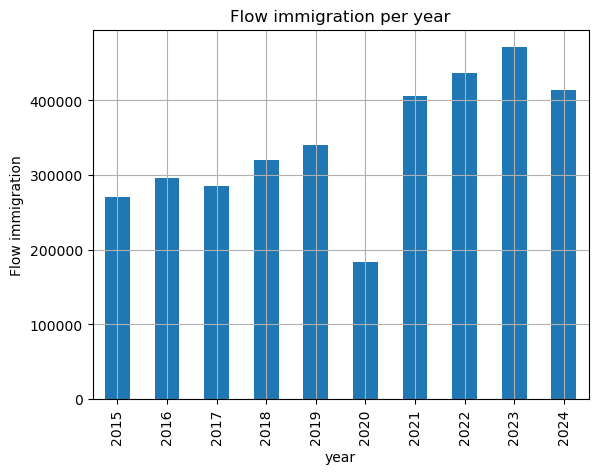

In [10]:
ax = immigration_year.plot(kind='bar')
ax.set_title('Flow immigration per year')
ax.set_ylabel('Flow immigration')
ax.grid()
ax

# immigration by country

In [11]:
countries_selection = imm_cumul_df.sort_values('immigration_flow', ascending=False).head(20)
countries_selection['Immigration_flow (000`)'] = countries_selection['immigration_flow'] / 1000
countries_selection = countries_selection.reset_index()
countries_selection = countries_selection.drop(columns = {'index', 'immigration_flow'})
countries_selection = countries_selection.set_index('country').sort_values('Immigration_flow (000`)')
countries_selection

,Immigration_flow (000`)
country,
Jamaica,36.375
Morocco,38.215
Algeria,39.655
Mexico,40.410
Viet Nam,41.200
"Korea, Rep.",49.120
Brazil,50.365
United Kingdom,50.770
Cameroon,50.885


<Axes: title={'center': 'Immigration by country from 2015-2024'}, ylabel='country'>

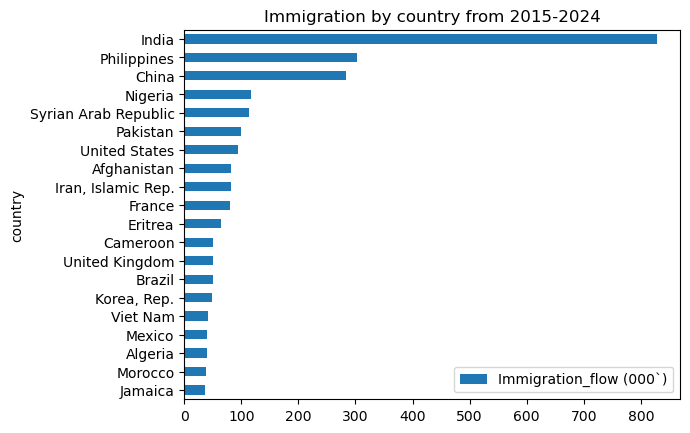

In [12]:
ax = countries_selection.plot(kind = "barh")
ax.set_title("Immigration by country from 2015-2024")
ax

# macro_data average

In [13]:
print(f'size before{macro_data_df.shape}')
macro_data_df_clean = macro_data_df.replace('', np.nan)
macro_data_df_clean = macro_data_df.dropna(how="any")
print(f'size after{macro_data_df_clean.shape}')

size before(16533, 7)
size after(11409, 7)


In [14]:
macro_data_df_clean

,Unnamed: 0,iso3Code,iso2Code,country,year,indicator,value
0,0,AFG,AF,Afghanistan,2023,GDP per capita (constant 2015 US$),379.707497
1,1,AFG,AF,Afghanistan,2022,GDP per capita (constant 2015 US$),377.665627
2,2,AFG,AF,Afghanistan,2021,GDP per capita (constant 2015 US$),408.625855
3,3,AFG,AF,Afghanistan,2020,GDP per capita (constant 2015 US$),527.834554
4,4,AFG,AF,Afghanistan,2019,GDP per capita (constant 2015 US$),557.861533
...,...,...,...,...,...,...,...
16528,16528,VUT,VU,Vanuatu,2019,Voice and Accountability: Number of Sources,4.000000
16529,16529,VUT,VU,Vanuatu,2018,Voice and Accountability: Number of Sources,3.000000
16530,16530,VUT,VU,Vanuatu,2017,Voice and Accountability: Number of Sources,3.000000
16531,16531,VUT,VU,Vanuatu,2016,Voice and Accountability: Number of Sources,3.000000


In [15]:
macro_data_avg_df = macro_data_df_clean.groupby(['country', 'indicator'])['value'].mean() 
macro_data_avg_df

country      indicator                                                                                     
Afghanistan  GDP per capita (constant 2015 US$)                                                                4.996702e+02
             Level of water stress: freshwater withdrawal as a proportion of available freshwater resources    5.475702e+01
             Population density (people per sq. km of land area)                                               5.720158e+01
             Population, total                                                                                 3.776927e+07
             Rural population (% of total population)                                                          7.419878e+01
                                                                                                                   ...     
Zimbabwe     Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)                               3.700000e+01
             Rural popul

In [16]:
macro_data_avg_df= macro_data_avg_df.reset_index()
macro_data_avg_df

,country,indicator,value
0,Afghanistan,GDP per capita (constant 2015 US$),4.996702e+02
1,Afghanistan,Level of water stress: freshwater withdrawal a...,5.475702e+01
2,Afghanistan,Population density (people per sq. km of land ...,5.720158e+01
3,Afghanistan,"Population, total",3.776927e+07
4,Afghanistan,Rural population (% of total population),7.419878e+01
...,...,...,...
1512,Zimbabwe,Poverty headcount ratio at $2.15 a day (2017 P...,3.700000e+01
1513,Zimbabwe,Rural population (% of total population),6.768956e+01
1514,Zimbabwe,Unemployment with advanced education (% of tot...,6.156250e+00
1515,Zimbabwe,"Unemployment, total (% of total labor force) (...",9.087000e+00


In [17]:
macro_data_avg_pivot = macro_data_avg_df.pivot(index='country', columns='indicator', values='value')
macro_data_avg_pivot

indicator,GDP per capita (constant 2015 US$),Level of water stress: freshwater withdrawal as a proportion of available freshwater resources,Market capitalization of listed domestic companies (% of GDP),Population density (people per sq. km of land area),"Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Rural population (% of total population),S&P Global Equity Indices (annual % change),Unemployment with advanced education (% of total labor force with advanced education),"Unemployment, total (% of total labor force) (national estimate)",Voice and Accountability: Number of Sources
country,,,,,,,,,,,
Afghanistan,499.670207,54.757019,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333,9.555556
Albania,4568.486552,5.815591,NaN,103.914380,2.836000e+06,0.100,38.859000,NaN,15.266800,13.999400,11.000000
Algeria,4623.518157,135.066031,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000,10.777778
Andorra,38684.748525,NaN,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN,2.000000
Angola,2680.045162,1.871883,NaN,25.554171,3.240189e+07,31.100,33.869000,NaN,17.857500,16.148000,12.222222
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,17530.700333,9.786096,NaN,19.364968,3.389126e+06,0.125,4.581556,NaN,2.457000,8.607444,11.666667
Uzbekistan,3231.037001,151.543693,7.293615,74.317431,3.306807e+07,2.300,49.477556,NaN,1.509000,6.627167,8.666667
Vanuatu,2780.356739,NaN,NaN,23.704994,2.924578e+05,10.000,74.573778,NaN,2.113000,4.745500,3.555556


In [18]:
macro_data_avg_pivot = macro_data_avg_pivot.rename(columns={
                                                'GDP per capita (constant 2015 US$)' : 'GDP_percapita' , 
                                                'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)' : 'Poverty headcount' ,                                                 
                                                'Unemployment with advanced education (% of total labor force with advanced education)' : 'Unemployment_educated' , 
                                                'Unemployment, total (% of total labor force) (national estimate)' : 'Unemployment_total' , 
                                                 'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources' : 'Level of water stress' , 
                                                 'Market capitalization of listed domestic companies (% of GDP)' : 'Market capitalization' , 
                                                 'Population density (people per sq. km of land area)' : 'Population density' , 
                                                 'Rural population (% of total population)' : 'Rural population' ,      
                                                 'S&P Global Equity Indices (annual % change)' : 'S&P Global Equity Indices' ,    
                                                 'Voice and Accountability: Number of Sources' : 'Voice and Accountability' ,                                   
                                                            })
macro_data_avg_pivot

indicator,GDP_percapita,Level of water stress,Market capitalization,Population density,"Population, total",Poverty headcount,Rural population,S&P Global Equity Indices,Unemployment_educated,Unemployment_total,Voice and Accountability
country,,,,,,,,,,,
Afghanistan,499.670207,54.757019,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333,9.555556
Albania,4568.486552,5.815591,NaN,103.914380,2.836000e+06,0.100,38.859000,NaN,15.266800,13.999400,11.000000
Algeria,4623.518157,135.066031,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000,10.777778
Andorra,38684.748525,NaN,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN,2.000000
Angola,2680.045162,1.871883,NaN,25.554171,3.240189e+07,31.100,33.869000,NaN,17.857500,16.148000,12.222222
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,17530.700333,9.786096,NaN,19.364968,3.389126e+06,0.125,4.581556,NaN,2.457000,8.607444,11.666667
Uzbekistan,3231.037001,151.543693,7.293615,74.317431,3.306807e+07,2.300,49.477556,NaN,1.509000,6.627167,8.666667
Vanuatu,2780.356739,NaN,NaN,23.704994,2.924578e+05,10.000,74.573778,NaN,2.113000,4.745500,3.555556


In [19]:
imm_vs_macrodata_df = pd.merge(macro_data_avg_pivot,imm_cumul_df, on='country')

imm_vs_macrodata_df

,country,GDP_percapita,Level of water stress,Market capitalization,Population density,"Population, total",Poverty headcount,Rural population,S&P Global Equity Indices,Unemployment_educated,Unemployment_total,Voice and Accountability,immigration_flow
0,Afghanistan,499.670207,54.757019,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333,9.555556,81305
1,Albania,4568.486552,5.815591,NaN,103.914380,2.836000e+06,0.100,38.859000,NaN,15.266800,13.999400,11.000000,5540
2,Algeria,4623.518157,135.066031,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000,10.777778,39655
3,Andorra,38684.748525,NaN,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN,2.000000,0
4,Angola,2680.045162,1.871883,NaN,25.554171,3.240189e+07,31.100,33.869000,NaN,17.857500,16.148000,12.222222,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uruguay,17530.700333,9.786096,NaN,19.364968,3.389126e+06,0.125,4.581556,NaN,2.457000,8.607444,11.666667,335
162,Uzbekistan,3231.037001,151.543693,7.293615,74.317431,3.306807e+07,2.300,49.477556,NaN,1.509000,6.627167,8.666667,1535
163,Vanuatu,2780.356739,NaN,NaN,23.704994,2.924578e+05,10.000,74.573778,NaN,2.113000,4.745500,3.555556,0
164,Zambia,1295.356040,2.835498,15.693374,24.559481,1.853135e+07,62.550,55.907667,4.750816,7.059286,6.317000,13.222222,605


In [20]:
imm_vs_macrodata_df['immigration_100k'] = imm_vs_macrodata_df['immigration_flow'] / imm_vs_macrodata_df['Population, total'] * 100000
imm_vs_macrodata_df

,country,GDP_percapita,Level of water stress,Market capitalization,Population density,"Population, total",Poverty headcount,Rural population,S&P Global Equity Indices,Unemployment_educated,Unemployment_total,Voice and Accountability,immigration_flow,immigration_100k
0,Afghanistan,499.670207,54.757019,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333,9.555556,81305,215.267575
1,Albania,4568.486552,5.815591,NaN,103.914380,2.836000e+06,0.100,38.859000,NaN,15.266800,13.999400,11.000000,5540,195.345527
2,Algeria,4623.518157,135.066031,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000,10.777778,39655,91.793054
3,Andorra,38684.748525,NaN,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN,2.000000,0,0.000000
4,Angola,2680.045162,1.871883,NaN,25.554171,3.240189e+07,31.100,33.869000,NaN,17.857500,16.148000,12.222222,925,2.854772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uruguay,17530.700333,9.786096,NaN,19.364968,3.389126e+06,0.125,4.581556,NaN,2.457000,8.607444,11.666667,335,9.884554
162,Uzbekistan,3231.037001,151.543693,7.293615,74.317431,3.306807e+07,2.300,49.477556,NaN,1.509000,6.627167,8.666667,1535,4.641940
163,Vanuatu,2780.356739,NaN,NaN,23.704994,2.924578e+05,10.000,74.573778,NaN,2.113000,4.745500,3.555556,0,0.000000
164,Zambia,1295.356040,2.835498,15.693374,24.559481,1.853135e+07,62.550,55.907667,4.750816,7.059286,6.317000,13.222222,605,3.264738


In [21]:
imm_vs_macrodata_df = imm_vs_macrodata_df[['country', 'GDP_percapita', 'Level of water stress',
       'Market capitalization', 'Population density',
       'Poverty headcount', 'Rural population', 'S&P Global Equity Indices',
       'Unemployment_educated', 'Unemployment_total',
       'Voice and Accountability', 'Population, total', 'immigration_flow', 'immigration_100k']]
imm_vs_macrodata_df

,country,GDP_percapita,Level of water stress,Market capitalization,Population density,Poverty headcount,Rural population,S&P Global Equity Indices,Unemployment_educated,Unemployment_total,Voice and Accountability,"Population, total",immigration_flow,immigration_100k
0,Afghanistan,499.670207,54.757019,NaN,57.201582,NaN,74.198778,NaN,13.208333,9.524333,9.555556,3.776927e+07,81305,215.267575
1,Albania,4568.486552,5.815591,NaN,103.914380,0.100,38.859000,NaN,15.266800,13.999400,11.000000,2.836000e+06,5540,195.345527
2,Algeria,4623.518157,135.066031,0.170707,17.982629,NaN,26.865444,NaN,17.750000,11.136000,10.777778,4.320044e+07,39655,91.793054
3,Andorra,38684.748525,NaN,NaN,160.958245,NaN,11.983556,NaN,NaN,NaN,2.000000,7.622878e+04,0,0.000000
4,Angola,2680.045162,1.871883,NaN,25.554171,31.100,33.869000,NaN,17.857500,16.148000,12.222222,3.240189e+07,925,2.854772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uruguay,17530.700333,9.786096,NaN,19.364968,0.125,4.581556,NaN,2.457000,8.607444,11.666667,3.389126e+06,335,9.884554
162,Uzbekistan,3231.037001,151.543693,7.293615,74.317431,2.300,49.477556,NaN,1.509000,6.627167,8.666667,3.306807e+07,1535,4.641940
163,Vanuatu,2780.356739,NaN,NaN,23.704994,10.000,74.573778,NaN,2.113000,4.745500,3.555556,2.924578e+05,0,0.000000
164,Zambia,1295.356040,2.835498,15.693374,24.559481,62.550,55.907667,4.750816,7.059286,6.317000,13.222222,1.853135e+07,605,3.264738


In [22]:
def regression_plot(dataframe, col1, col2):
    
    df_regression = dataframe[[col1,col2]]
    df_regression = df_regression.dropna(how= 'any')


    x_axis = df_regression[col1]
    y_axis = df_regression[col2]

    ## calculate slope and intercept of the regression equation

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    #print the r-value

    print(f' The r^value is : {round(rvalue,3)}')

    ### generate the equation to be used as annotation
    
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    ## generate the regression line plot 

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}')

    ## Conditional Annotation position

    if slope >= 0 :
        x_annot_pos = 0.05
        y_annot_pos = 0.9
    else : x_annot_pos, y_annot_pos = 0.05, 0.1

    plt.annotate(line_eq,(x_annot_pos,y_annot_pos), fontsize=12,color="red", xycoords='axes fraction')

    # plt.savefig(f'Output/Q4_regression_{col1}_vs_{col2}.png')
    plt.show()

In [24]:
# function to generate a plot + regression line between two columns to be defined as arguments. the data is free from outliers

def regression_plot_outliersfree(dataframe, col1, col2):
    
    # creae a Df with the 2 selected columns
    df_regression = dataframe[[col1,col2]]

    # drop empty rows from new DF
    df_regression = df_regression.dropna(how= 'any')


    # identify outliers
    var = df_regression[col2]
    q1 = np.quantile(var, 0.25) 
    q3 = np.quantile(var, 0.75)   
    iqr = q3 - q1
    outliers = var[(var > (q3 + (iqr * 1.5))) | (var < (q1 - (iqr * 1.5)))].tolist()

    # drop  outliers from new DF
    x = ~df_regression[col2].isin(outliers)
    dataframe_filtered = df_regression[x]


    # define axis of the scaterplot

    x_axis = dataframe_filtered[col1]
    y_axis = dataframe_filtered[col2]

    ## calculate slope and intercept of the regression equation

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    #print the r-value

    print(f' The r^value is : {round(rvalue,3)}')

    ### generate the equation to be used as annotation
    
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    ## generate the regression line plot 

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}')

    ## Conditional Annotation position

    if slope >= 0 :
        x_annot_pos = 0.05
        y_annot_pos = 0.9
    else : x_annot_pos, y_annot_pos = 0.05, 0.1

    plt.annotate(line_eq,(x_annot_pos,y_annot_pos), fontsize=12,color="red", xycoords='axes fraction')

    # plt.savefig(f'Output/Q4_regression_{col1}_vs_{col2}.png')
    plt.show()

 The r^value is : 0.114


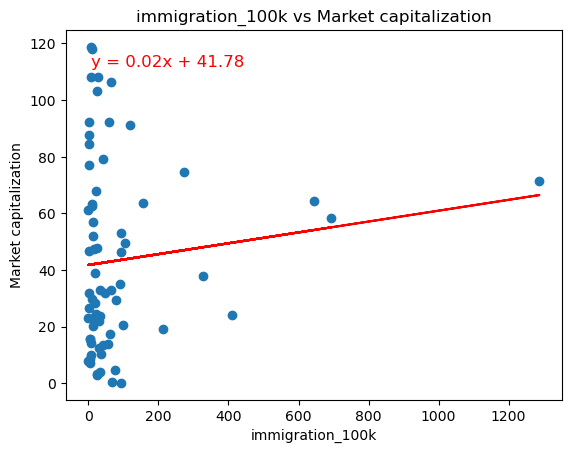

In [27]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Market capitalization')

 The r^value is : 0.18


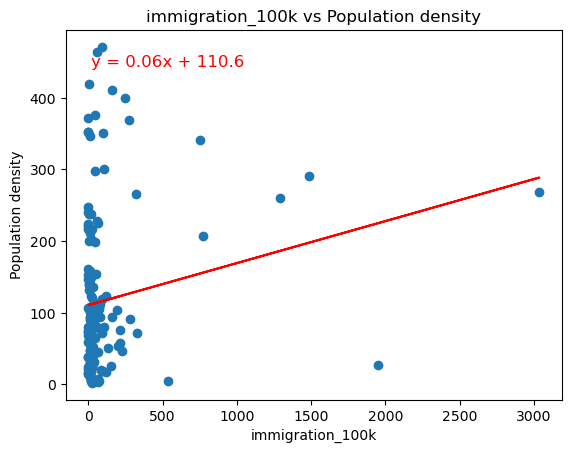

In [28]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Population density')

 The r^value is : -0.079


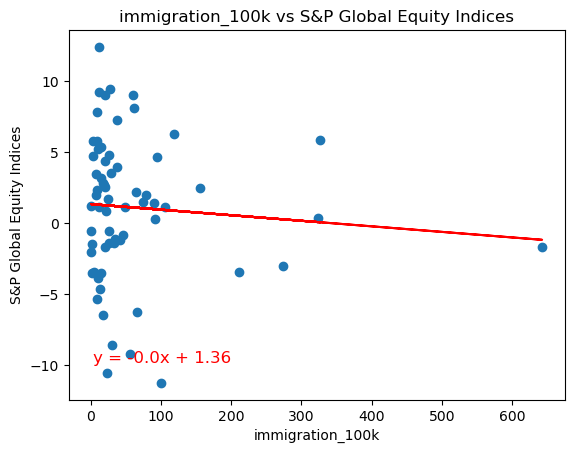

In [29]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'S&P Global Equity Indices')

 The r^value is : -0.352


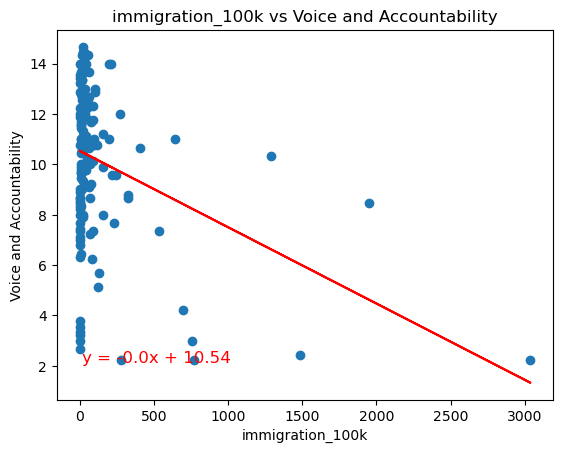

In [30]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Voice and Accountability')

 The r^value is : -0.04


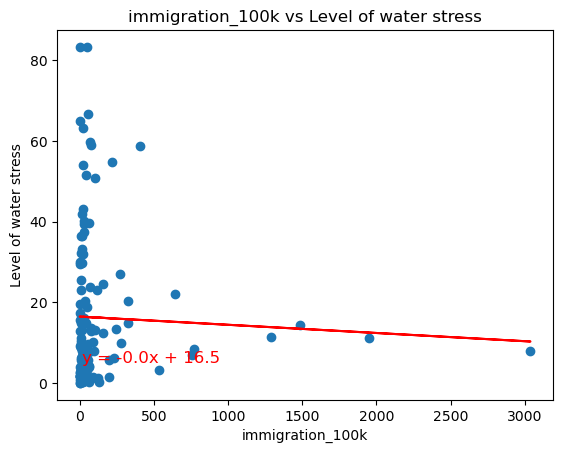

In [31]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Level of water stress')

 The r^value is : -0.005


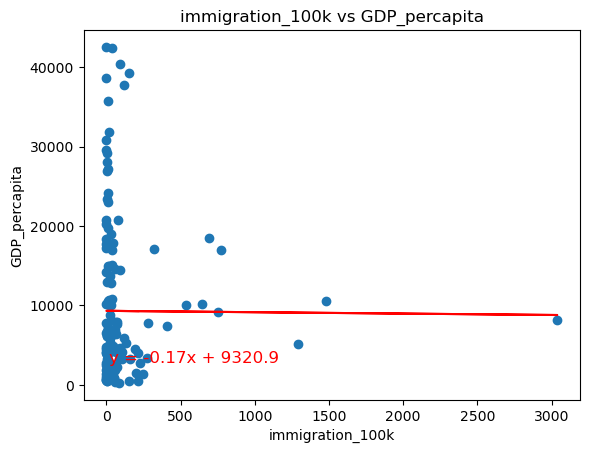

In [32]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'GDP_percapita')

 The r^value is : -0.125


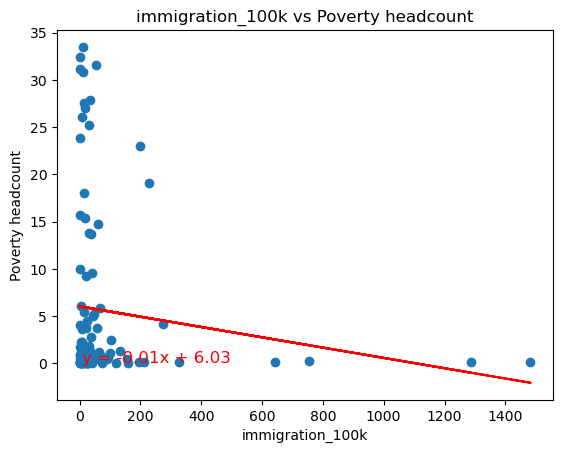

In [34]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Poverty headcount')


 The r^value is : 0.185


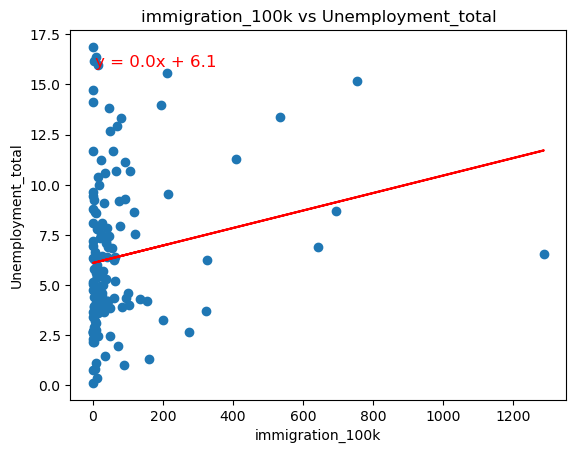

In [35]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Unemployment_total')

 The r^value is : 0.114


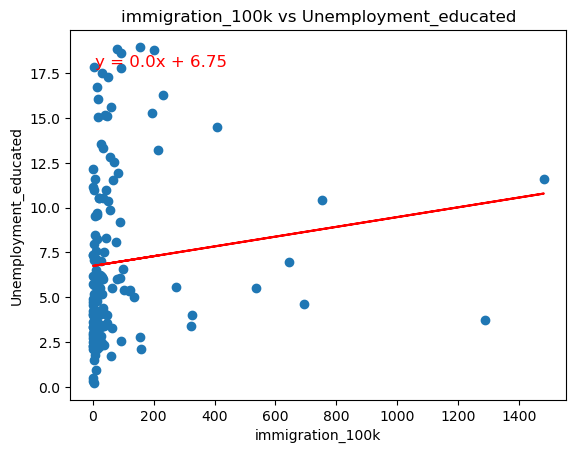

In [36]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Unemployment_educated')

In [37]:
indicators_list = imm_vs_macrodata_df.columns.to_list()
indicators_list = indicators_list[1:len(indicators_list)-3]
indicators_list

['GDP_percapita',
 'Level of water stress',
 'Market capitalization',
 'Population density',
 'Poverty headcount',
 'Rural population',
 'S&P Global Equity Indices',
 'Unemployment_educated',
 'Unemployment_total',
 'Voice and Accountability']

In [38]:
# function that compares all the indicators against ONE (immigration flow or immigration_100K) and generate a DF with al the regression parameters

def select_indicator(dataframe):
    
    # create list of indicator from the Dataframe consolidated
    indicators_list = dataframe.columns.to_list()
    indicators_list = indicators_list[1:len(indicators_list)-3]
    indicators_list

    # create list of returned values
    indic_selection = []

    # loop through the indicators
    for ind in indicators_list :
        col1 = 'immigration_flow'
        col2 = ind


        df_regression = dataframe[[col1,col2]]
        
        #drop empty values

        df_regression = df_regression.dropna(how= 'any')


        # identify outliers
        var = df_regression[col2]
        q1 = np.quantile(var, 0.25) 
        q3 = np.quantile(var, 0.75)   
        iqr = q3 - q1
        outliers = var[(var > (q3 + (iqr * 1.5))) | (var < (q1 - (iqr * 1.5)))].tolist()

        # Exclude  outliers
        x = ~df_regression[col2].isin(outliers)
        dataframe_filtered = df_regression[x]

        x_axis = dataframe_filtered[col1]
        y_axis = dataframe_filtered[col2]

        ## calculate slope and intercept of the regression equation

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
        

        # append regresson values in list of dictionaries
        indic_selection.append({
                            'indicator A' : col1,
                            'indicator B' : col2,
                            'slope' : slope,
                            'intercept' :  intercept, 
                            'rvalue' : rvalue, 
                            'pvalue' : pvalue, 
                            'std' : stderr

                            })
    
    # create DF from list of indicators compared
    selection_df = pd.DataFrame(indic_selection)
    selection_df = selection_df.sort_values('rvalue')
        
    return selection_df.head(10)


In [39]:
# run the function and compare all indicators
select_indicator(imm_vs_macrodata_df)

,indicator A,indicator B,slope,intercept,rvalue,pvalue,std
0,immigration_flow,GDP_percapita,-1.142385e-02,9510.343871,-0.086139,0.299550,0.010973
8,immigration_flow,Unemployment_total,-7.742839e-07,6.424778,-0.016071,0.850515,0.000004
4,immigration_flow,Poverty headcount,9.910258e-06,5.357667,0.096655,0.331424,0.000010
5,immigration_flow,Rural population,3.308971e-05,39.258763,0.101431,0.194858,0.000025
6,immigration_flow,S&P Global Equity Indices,5.233532e-06,0.956986,0.118289,0.348003,0.000006
9,immigration_flow,Voice and Accountability,5.228195e-06,10.071832,0.132776,0.102956,0.000003
7,immigration_flow,Unemployment_educated,1.264022e-05,6.762675,0.199511,0.018113,0.000005
2,immigration_flow,Market capitalization,6.246994e-05,41.345371,0.210039,0.083234,0.000036
1,immigration_flow,Level of water stress,6.859007e-05,14.861460,0.300430,0.000570,0.000019
3,immigration_flow,Population density,4.532359e-04,108.823502,0.309388,0.000111,0.000114


In [19]:
### import and read csv file

path = 'Output/immigrants_by_country_monthly.csv'
imm_race = pd.read_csv(path)


imm_race.head(5)

,index,country,year,month_str,month_int,quarter,immigration_flow
0,0,Afghanistan,2015,Feb,2,Q1,125
1,1,Albania,2015,Feb,2,Q1,25
2,2,Algeria,2015,Feb,2,Q1,125
3,3,Antigua and Barbuda,2015,Feb,2,Q1,5
4,4,Argentina,2015,Feb,2,Q1,15


In [20]:
imm_race['month'] = imm_race['month_int']
imm_race['date'] = pd.to_datetime(imm_race[['year','month']].assign(day=1))

imm_race.head(5)

,index,country,year,month_str,month_int,quarter,immigration_flow,month,date
0,0,Afghanistan,2015,Feb,2,Q1,125,2,2015-02-01
1,1,Albania,2015,Feb,2,Q1,25,2,2015-02-01
2,2,Algeria,2015,Feb,2,Q1,125,2,2015-02-01
3,3,Antigua and Barbuda,2015,Feb,2,Q1,5,2,2015-02-01
4,4,Argentina,2015,Feb,2,Q1,15,2,2015-02-01


In [21]:
imm_race = imm_race.pivot_table(columns='country', index='date', values = 'immigration_flow',aggfunc='sum')

imm_race.head(5)

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,90.0,15.0,80.0,NaN,0.0,0.0,10.0,10.0,95.0,10.0,...,455.0,0.0,5.0,NaN,40.0,90.0,25.0,15.0,0.0,15.0
2015-02-01,125.0,25.0,125.0,NaN,NaN,5.0,15.0,10.0,70.0,10.0,...,450.0,0.0,5.0,NaN,40.0,165.0,20.0,5.0,NaN,15.0
2015-03-01,220.0,50.0,235.0,NaN,0.0,10.0,15.0,10.0,100.0,5.0,...,470.0,0.0,25.0,NaN,75.0,180.0,20.0,25.0,0.0,25.0
2015-04-01,135.0,45.0,255.0,0.0,10.0,0.0,25.0,20.0,145.0,10.0,...,565.0,0.0,15.0,NaN,80.0,155.0,20.0,20.0,0.0,15.0
2015-05-01,220.0,45.0,340.0,NaN,0.0,0.0,25.0,15.0,160.0,10.0,...,740.0,10.0,10.0,NaN,70.0,150.0,25.0,15.0,0.0,20.0


In [38]:
imm_race = imm_race.fillna(0)
imm_race.head(20)

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,90.0,15.0,80.0,0.0,0.0,0.0,10.0,10.0,95.0,10.0,...,455.0,0.0,5.0,0.0,40.0,90.0,25.0,15.0,0.0,15.0
2015-02-01,125.0,25.0,125.0,0.0,0.0,5.0,15.0,10.0,70.0,10.0,...,450.0,0.0,5.0,0.0,40.0,165.0,20.0,5.0,0.0,15.0
2015-03-01,220.0,50.0,235.0,0.0,0.0,10.0,15.0,10.0,100.0,5.0,...,470.0,0.0,25.0,0.0,75.0,180.0,20.0,25.0,0.0,25.0
2015-04-01,135.0,45.0,255.0,0.0,10.0,0.0,25.0,20.0,145.0,10.0,...,565.0,0.0,15.0,0.0,80.0,155.0,20.0,20.0,0.0,15.0
2015-05-01,220.0,45.0,340.0,0.0,0.0,0.0,25.0,15.0,160.0,10.0,...,740.0,10.0,10.0,0.0,70.0,150.0,25.0,15.0,0.0,20.0
2015-06-01,195.0,75.0,280.0,0.0,0.0,5.0,20.0,40.0,110.0,15.0,...,750.0,0.0,20.0,0.0,90.0,190.0,40.0,20.0,0.0,15.0
2015-07-01,250.0,45.0,310.0,0.0,0.0,5.0,25.0,45.0,135.0,5.0,...,760.0,0.0,15.0,0.0,65.0,250.0,30.0,15.0,0.0,25.0
2015-08-01,145.0,65.0,280.0,0.0,0.0,5.0,20.0,50.0,140.0,5.0,...,855.0,10.0,5.0,0.0,115.0,205.0,40.0,15.0,10.0,20.0
2015-09-01,375.0,60.0,355.0,0.0,0.0,5.0,20.0,40.0,140.0,15.0,...,660.0,0.0,25.0,0.0,80.0,430.0,60.0,20.0,5.0,20.0


# create the bar race
#### source : https://github.com/dexplo/bar_chart_race

#### Library bar_chart_race : bar_chart_race (pip install bar_chart_race)
#### documentation : https://www.dexplo.org/bar_chart_race/tutorial/

In [24]:
import bar_chart_race as bcr

In [40]:
df = imm_race
bcr.bar_chart_race(
        df=df, 
        filename='Output/monthly_immigration_flow_to_canada.gif', 

        orientation='h', 
        sort='desc', 
        n_bars=12, 
        fixed_order=False, 
        fixed_max=True, 
        steps_per_period=20, 
        period_length=750, 
        # end_period_pause=0,
        interpolate_period=False, 
        period_label={'x': .98, 'y': .3, 'ha': 'right', 'va': 'center'}, 
        # period_template='%B %d, %Y', 
        period_summary_func=lambda v, r: {'x': .98, 'y': .2, 
                                          's': f'Number of immigrants: {v.sum():,.0f}', 
                                          'ha': 'right', 'size': 11}, 
        perpendicular_bar_func='median', 
        # colors='dark12', 
        title='Monthly immigration flow to canada', 
        bar_size=.95, 
        # bar_textposition='inside',
        # bar_texttemplate='{x:,.0f}', 
        # bar_label_font=7, 
        # tick_label_font=7, 
        # tick_template='{x:,.0f}',
        shared_fontdict=None, 
        scale='linear', 
        fig=None, 
        writer=None, 
        bar_kwargs={'alpha': .7},
        # fig_kwargs={'figsize': (6, 3.5), 'dpi': 144},
        filter_column_colors=False) 

c:\Users\nazim\anaconda3\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
c:\Users\nazim\anaconda3\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(io.BytesIO())
c:\Users\nazim\anaconda3\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
c:\Users\nazim\anaconda3\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
c:\Users\nazim\anaconda3\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
c:\Users\nazim\anaconda